**Lab 4 : CLUSTERING Part 1**

In this Lab you will have to write code for 2 clustering algorithms based on the mathematical theory :

1. K-means Clustering
2. Gaussian Mixture Model

You will then have to use these algorithms on a pratical dataset and compare the results with the inbuilt algorithms present in scikit learn toolkit

**Please use plots wherever possible to demonstrate the results**

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')



# K-means Clustering

K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. 



**Step 1 : Data Generation** 

Generate 2D gaussian data of 4 types each having 100 points, by taking appropriate mean and varince (example: mean :(0.5 0) (5 5) (5 1) (10 1.5), variance : Identity matrix)

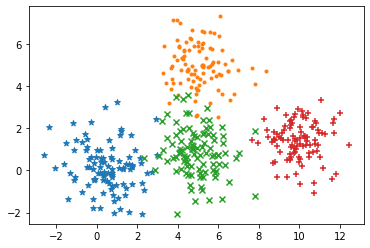

In [105]:
Data1 = np.random.normal(loc = (0.5, 0),scale = (1, 1), size = (100, 2)) 
Data2 = np.random.normal(loc = (5, 5),scale = (1, 1), size = (100, 2))
Data3 = np.random.normal(loc = (5, 1),scale = (1, 1), size = (100, 2))
Data4 = np.random.normal(loc = (10, 1.5),scale = (1, 1), size = (100, 2))
x1 = [x for x, y in Data1]
y1 = [y for x, y in Data1]

x2 = [x for x, y in Data2]
y2 = [y for x, y in Data2]

x3 = [x for x, y in Data3]
y3 = [y for x, y in Data3]

x4 = [x for x, y in Data4]
y4 = [y for x, y in Data4]

plt.scatter(x1, y1, marker = '*')
plt.scatter(x2, y2, marker = '.')
plt.scatter(x3, y3, marker = 'x')
plt.scatter(x4, y4, marker = '+')



plt.show()


**Step 2 : Cluster Initialisation**

Initialse K number of Clusters (Here, K=4)

In [111]:
Data = np.array([x1+x2+x3+x4,y1+y2+y3+y4]).T
Data_perm = np.random.permutation(Data)
mu = Data_perm[0:4]
c_init = np.array([])
for x in Data:
        k = np.argmin([ np.linalg.norm(i-np.array(x)) for i in mu])
        c_init = np.concatenate((c_init,[k]))
        
mu

array([[5.78483847, 0.73383956],
       [5.20109179, 4.99904829],
       [1.20325649, 1.87149795],
       [9.55768854, 0.56252157]])

**Step 3 : Cluster assignment and re-estimation Stage**

a) Using initial/estimated cluster centers (mean $\mu_{i}$) perform cluster assignment.

b) Assigned cluster for each feature vector ($X_{j}$) can be written as:
$$arg \min_{i} ||C_{i}-X_{j}||_{2},~1 \leq i \leq K,~1\leq j \leq N$$ 
c) Re-estimation: After cluster assignment, the mean vector is recomputed as,
$$\mu_{i}=\frac{1}{N_{i}}\sum_{j \in i^{th} cluster}X_{j}$$
where $N_{i}$ represents the number of datapoints in the $i^{th}$ cluster.

d) Objective function (to be minimized):
$$Error(\mu)=\frac{1}{N}\sum_{i=1}^{K}\sum_{j \in i^{th} cluster}||C_{i}-X_{j}||_{2}$$

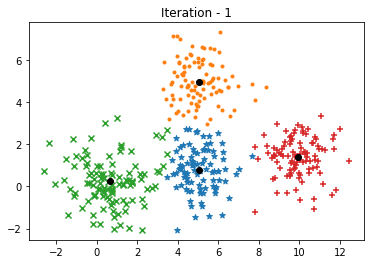

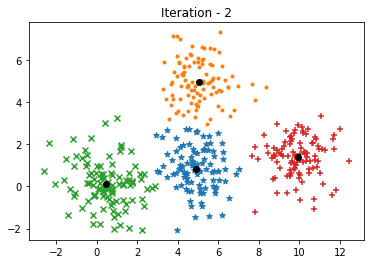

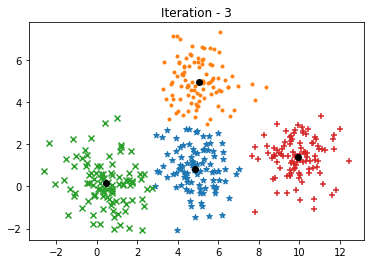

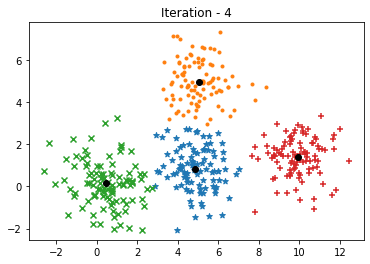

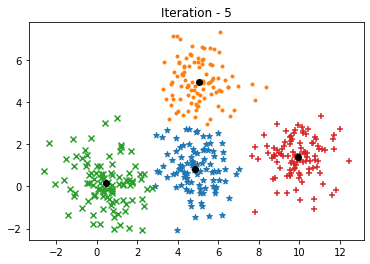

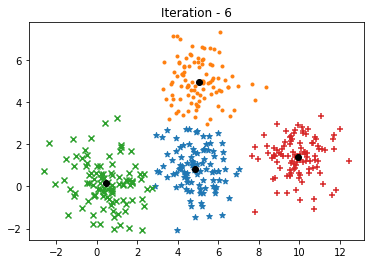

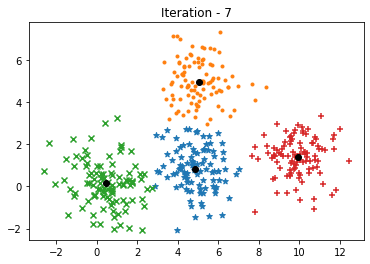

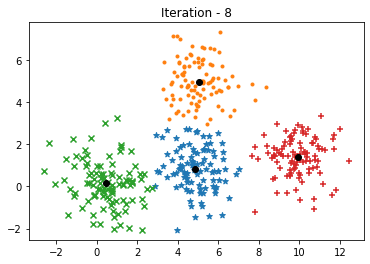

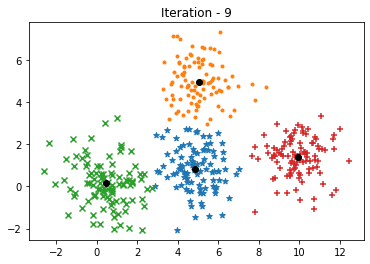

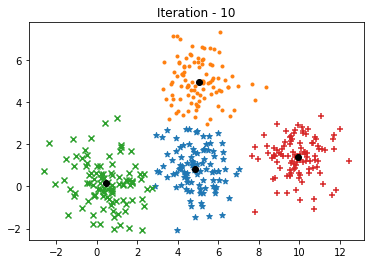

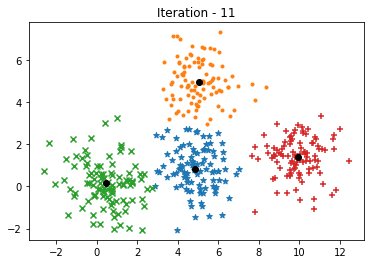

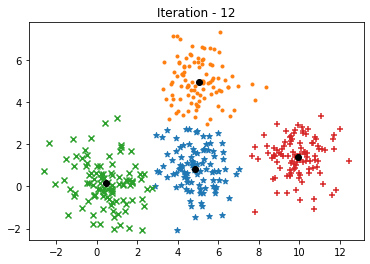

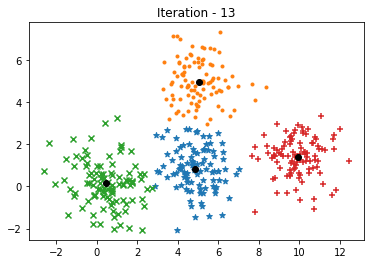

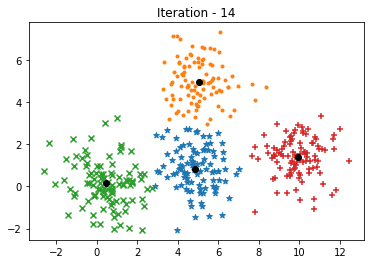

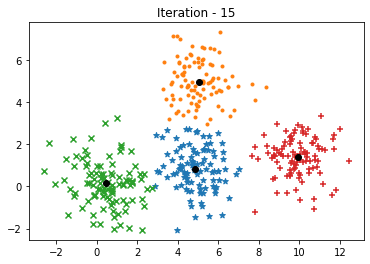

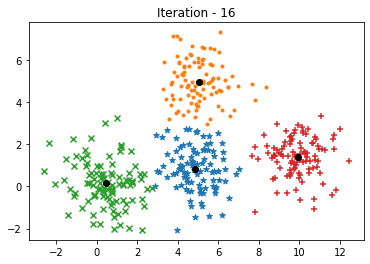

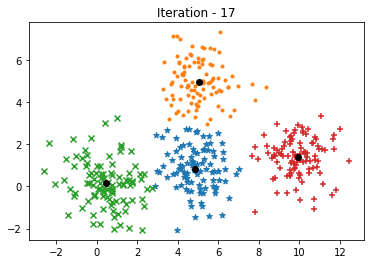

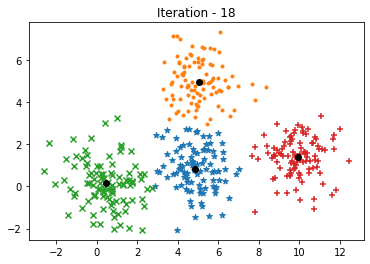

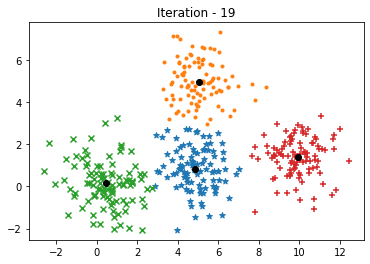

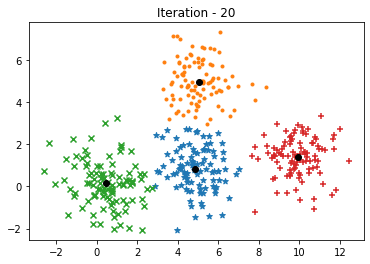

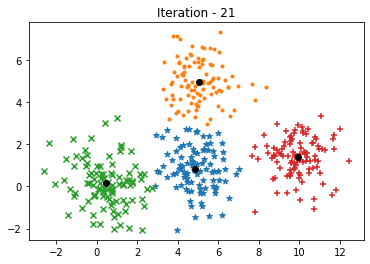

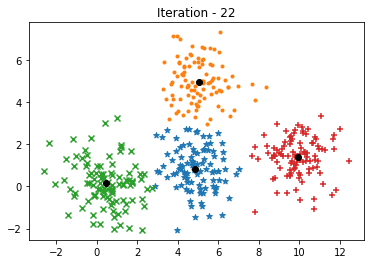

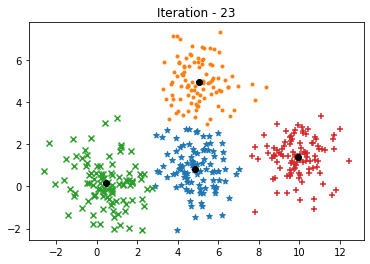

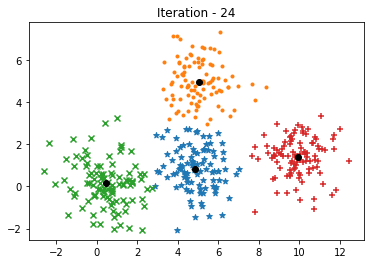

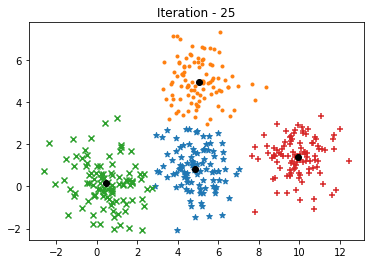

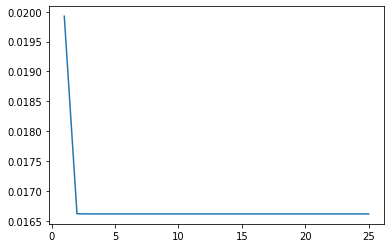

In [112]:
error = []

iter = 25
while iter:
    iter -= 1
    c = np.array([])
    #cluster assignment
    for x in Data:
        k = np.argmin([ np.linalg.norm(i-np.array(x)) for i in mu])
        c = np.concatenate((c,[k]))
    
    #objective function
    for z in range(0,4):
        summ = []
        summ.append(np.sum(np.linalg.norm(Data[c == z,:] - mu[z])))
    error.append(sum(summ)/(1.0*np.product(np.shape(Data))))
    #new means
    for z in range(0,4):
        mu[z] = np.mean(Data[c == z,:], axis = 0)
    
    x1 = [x for x, y in Data[c == 0,:]]
    y1 = [y for x, y in Data[c == 0,:]]

    x2 = [x for x, y in Data[c == 1,:]]
    y2 = [y for x, y in Data[c == 1,:]]

    x3 = [x for x, y in Data[c == 2,:]]
    y3 = [y for x, y in Data[c == 2,:]]

    x4 = [x for x, y in Data[c == 3,:]]
    y4 = [y for x, y in Data[c == 3,:]]
    
    plt.title("Iteration - {}".format(25-iter))
    
    
    plt.scatter(x1, y1, marker = '*')
    plt.scatter(x2, y2, marker = '.')
    plt.scatter(x3, y3, marker = 'x')
    plt.scatter(x4, y4, marker = '+')
    plt.scatter(mu[0,0],mu[0,1],c= '000000')
    plt.scatter(mu[1,0],mu[1,1],c= '000000')
    plt.scatter(mu[2,0],mu[2,1],c= '000000')
    plt.scatter(mu[3,0],mu[3,1],c= '000000')
    plt.show()

plt.plot(range(1,26),error)
plt.show()
    
   


**Step 4 : Performance metric**

Compute Homogeneity score and Silhouette coefficient using the information given below 

Homogeneity score : A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.
This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

Silhouette coeeficient : 

$a(x)$ : Average distance of x to all other vectors in same cluster

$b(x)$ : Average distance of x to the vectors in other clusters. Find minimum among the clusters

$s(x)$ = $\frac{b(x) - a(x)}{max(a(x),b(x))}$

Silhouette coefficient (SC) : 

$$ SC =  \frac{1}{N}\sum_{i=1}^{N}s(x) $$

In [113]:
from sklearn.metrics import homogeneity_score
print("homogeneity score of the Data is ", homogeneity_score(c,c_init))

S_x = np.array([])

for y in range(0,4):
    for x in Data[c==y]:
        a = np.mean(np.linalg.norm(Data[c==y,:]-x))
        b = np.mean(np.linalg.norm(Data-x))
        S_x = np.concatenate((S_x, np.array([(b-a)*1/(np.maximum(a,b))])))

print("silhouette coefficient :",np.mean(S_x))

homogeneity score of the Data is  0.9387779847117048
silhouette coefficient : 0.8254770297047321


# Gaussian Mixture Models Clustering

Gaussian mixture model is an unsupervised machine learning method. It summarizes a multivariate probability density function with a mixture of Gaussian probability distributions as its name suggests. It can be used for data clustering and data mining. In this lab, GMM is used for clustering.

**Step 1:  Data generation**

a) Follow the same steps as in K-means Clustering to generate the data

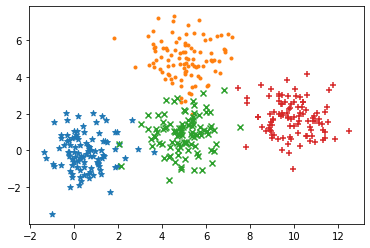

In [39]:
Data1 = np.random.normal(loc = (0.5, 0),scale = (1, 1), size = (100, 2)) 
Data2 = np.random.normal(loc = (5, 5),scale = (1, 1), size = (100, 2))
Data3 = np.random.normal(loc = (5, 1),scale = (1, 1), size = (100, 2))
Data4 = np.random.normal(loc = (10, 1.5),scale = (1, 1), size = (100, 2))
x1 = [x for x, y in Data1]
y1 = [y for x, y in Data1]

x2 = [x for x, y in Data2]
y2 = [y for x, y in Data2]

x3 = [x for x, y in Data3]
y3 = [y for x, y in Data3]

x4 = [x for x, y in Data4]
y4 = [y for x, y in Data4]

plt.scatter(x1, y1, marker = '*')
plt.scatter(x2, y2, marker = '.')
plt.scatter(x3, y3, marker = 'x')
plt.scatter(x4, y4, marker = '+')


**Step 2. Initialization**

a) Mean vector (randomly any from the given data points) ($\mu_{k}$)

b) Coveriance (initialize with (identity matrix)*max(data))  ($\Sigma_{k}$)

c) Weights (uniformly) ($w_{k}$), 
with constraint: $\sum_{k=1}^{K}w_{k}=1$

In [40]:
Data = np.array([x1+x2+x3+x4,y1+y2+y3+y4]).T

def initialization(data,K):
    mu = np.random.randint(min(data[:, 0]), max(data[:, 0]), size=(K, len(data[0])))
    cov = np.zeros((K, len(data[0]), len(data[0])))
    pi = np.ones(K)/K
    for n in range(len(cov)):
            np.fill_diagonal(cov[n], 1)
    theta = (mu,cov,pi)
    return theta



**Step 3: Expectation stage**

$$\gamma_{ik}=\frac{w_{k}P(x_{i}|\Phi_{k})}{\sum_{k=1}^{K}w_{k}P(x_{i}|\Phi_{k})}$$

where,
$$\Phi_{k}=\{\mu_{k},\Sigma_{k}\}$$
$$\theta_{k}=\{\Phi_{k},w_{k}\}$$
$$w_{k}=\frac{N_{k}}{N}$$
$$N_{k}=\sum_{i=1}^{N}\gamma_{ik}$$
$$P(x_{i}|\Phi_{k})=\frac{1}{(2 \pi)^{d/2}|\Sigma_{k}|^{1/2}}e^{-(x_{i}-\mu_{k})^{T}\Sigma_{k}^{-1}(x_{i}-\mu_{k})}$$

In [41]:
# E-Step GMM
from scipy.stats import multivariate_normal

def E_Step_GMM(data,K,theta):
    mu, cov, pi = theta
    reg_cov = 1e-6*np.identity(len(data[0]))
    responsibility = np.zeros((len(data), len(mu)))

    for pic, muc, covc, r in zip(pi, mu, cov, range(len(responsibility[0]))):
        covc += reg_cov
        mn = multivariate_normal(mean=muc, cov=covc)
        responsibility[:, r] = pic*mn.pdf(data)

    for r in range(len(responsibility)):
        responsibility[r, :] = responsibility[r, :] / np.sum(responsibility[r, :])

    return responsibility



**Step 4: Maximization stage**

a) $w_{k}=\frac{N_{k}}{N}$, where  $N_{k}=\sum_{i=1}^{N}\gamma_{ik}$

b) $\mu_{k}=\frac{\sum_{i=1}^{N}\gamma_{ik}x_{i}}{N_{k}}$

c) $\Sigma_{k}=\frac{\sum_{i=1}^{N}\gamma_{ik}(x_{i}-\mu_{k})(x_{i}-\mu_{k})^{T}}{N_{k}}$

Objective function(maximized through iteration):
$$L(\theta)=\sum_{i=1}^{N}log\sum_{k=1}^{K}w_{k}P(x_{i}|\Phi_{k})$$ 

In [42]:
# M-STEP GMM
def M_Step_GMM(data,responsibility):
    mc = np.sum(responsibility, axis=0)
    pi = mc/np.sum(mc)
    mu = np.dot(responsibility.T, data) / mc.reshape(4,1)
    reg_cov = 1e-6*np.identity(len(data[0]))
    cov = []

    for r in range(len(pi)):
        covc = 1/mc[r] * (np.dot( (responsibility[:, r].reshape(len(data), 1)*(data-mu[r]) ).T, data - mu[r]) + reg_cov)
        cov.append(covc)

    cov = np.asarray(cov)
    
    likelihood_sum = np.sum([pi[r]*multivariate_normal(mu[r], cov[r] + reg_cov).pdf(data) for r in range(len(pi))])
    log_likelihood = np.sum(np.log(likelihood_sum))
    
    theta = (mu,cov,pi)
    return theta, log_likelihood


**Step 5: Final run (EM algorithm)**

a) Initialization

b)Iterate E-M untill $L(\theta_{n})-L(\theta_{n-1}) \leq th$ 

c) Plot and see the cluster allocation at each iteration

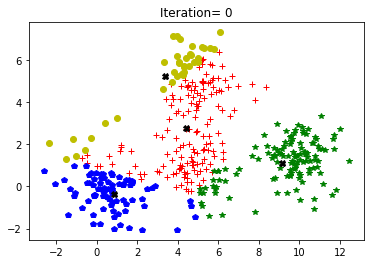

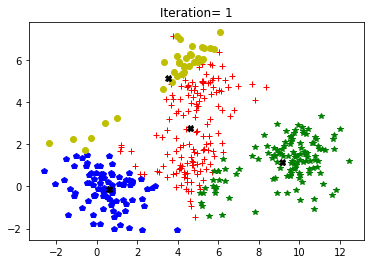

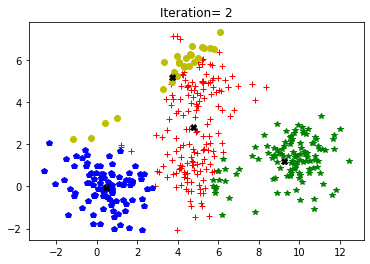

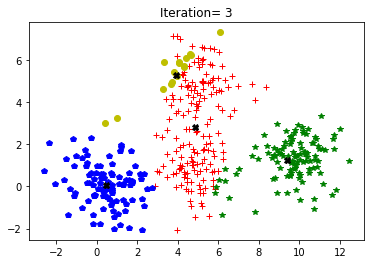

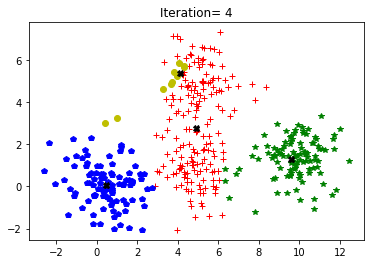

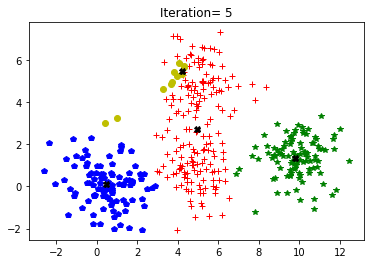

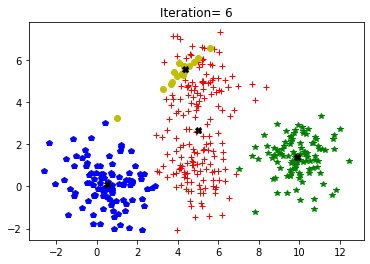

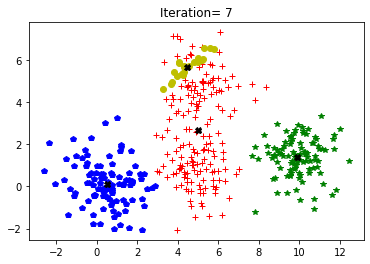

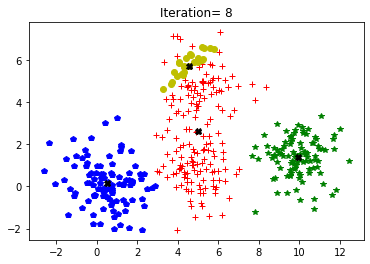

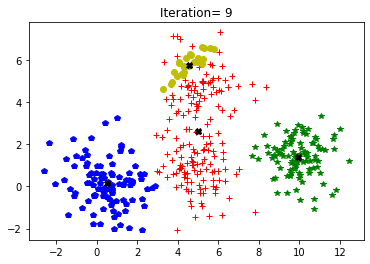

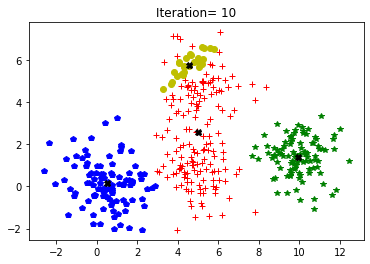

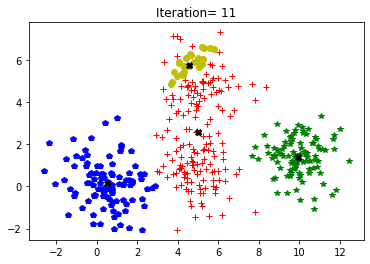

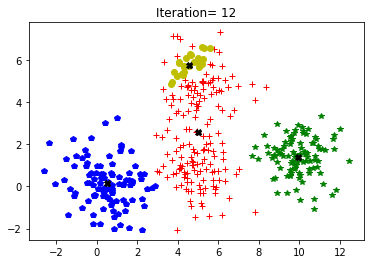

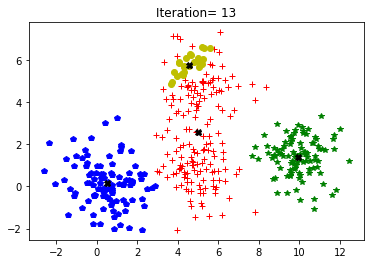

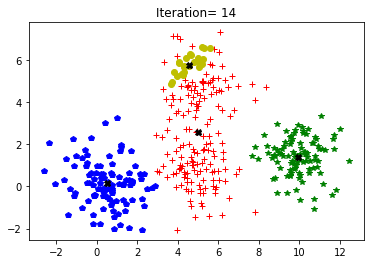

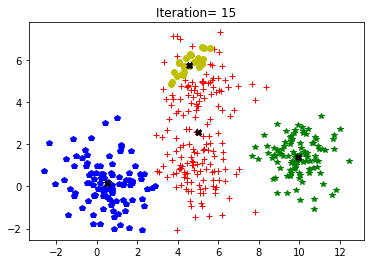

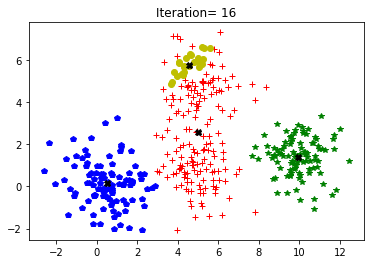

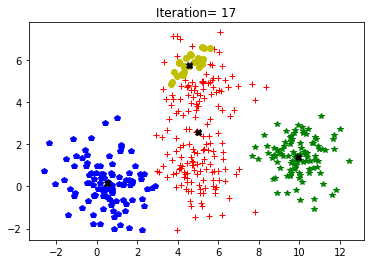

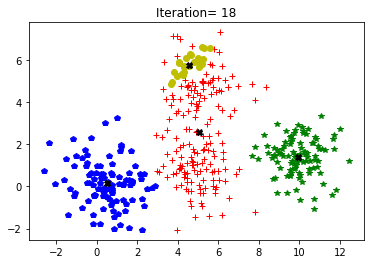

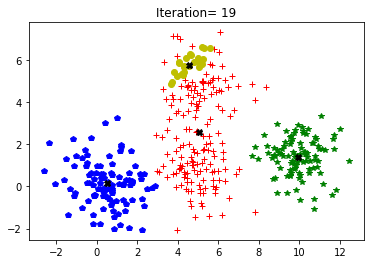

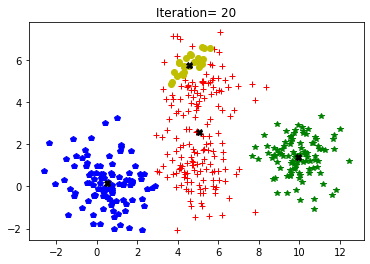

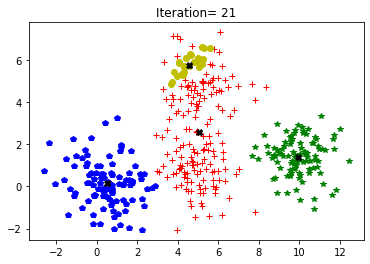

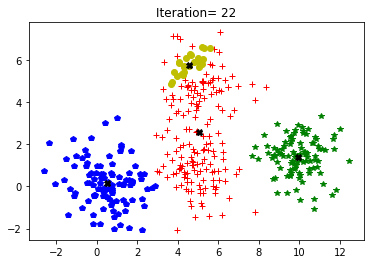

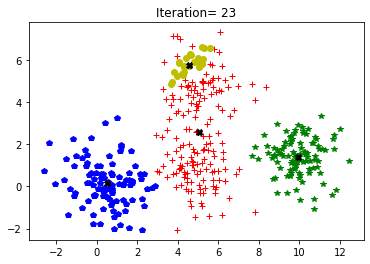

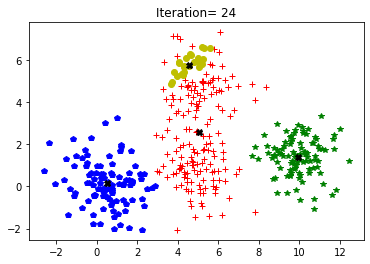

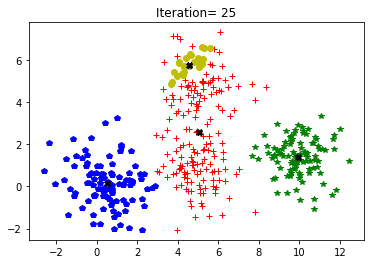

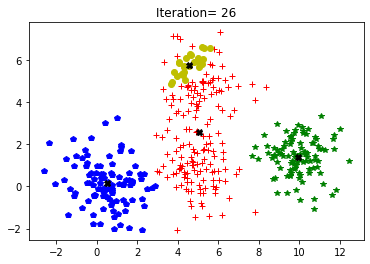

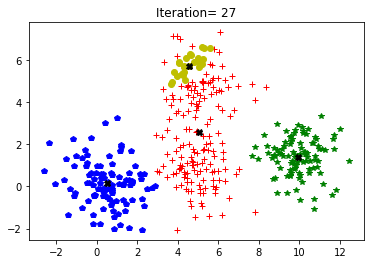

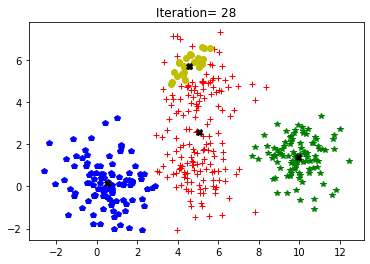

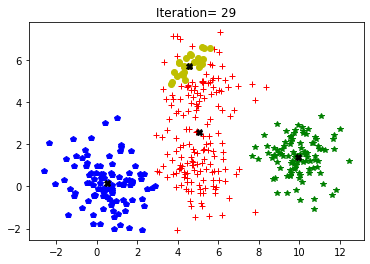

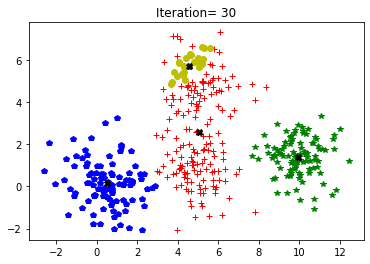

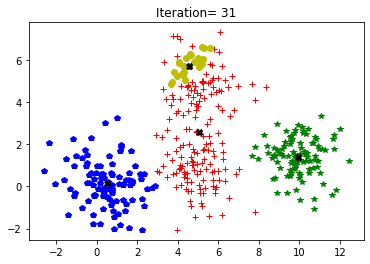

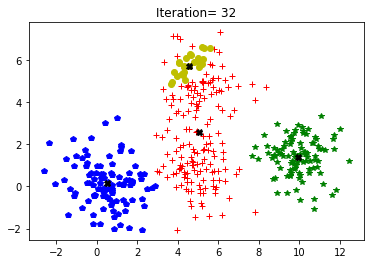

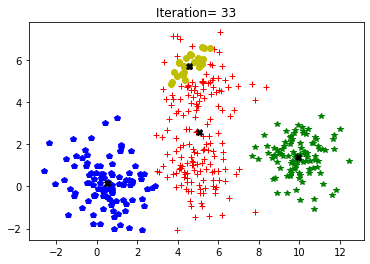

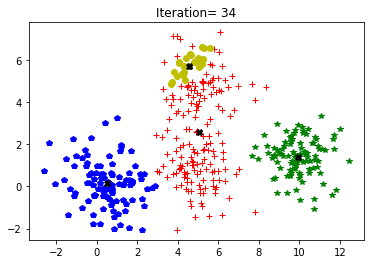

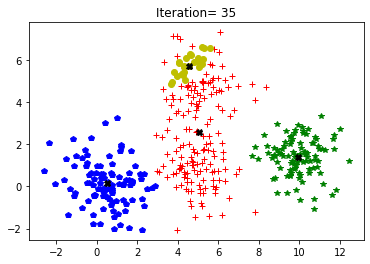

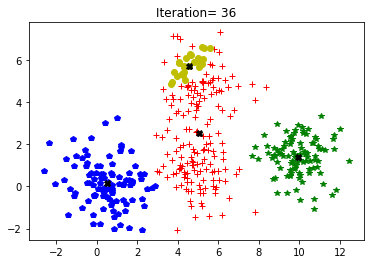

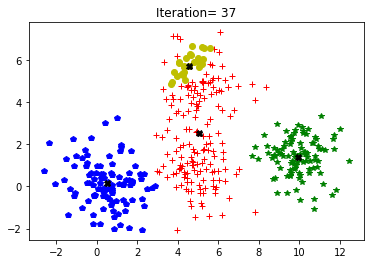

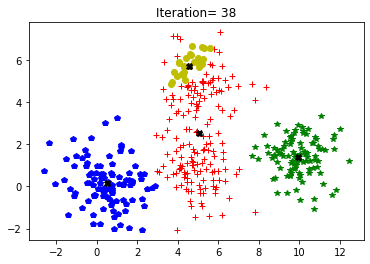

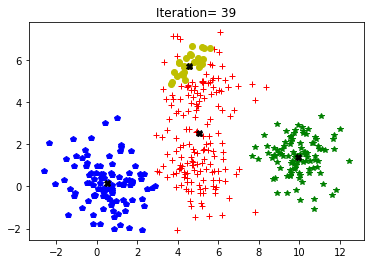

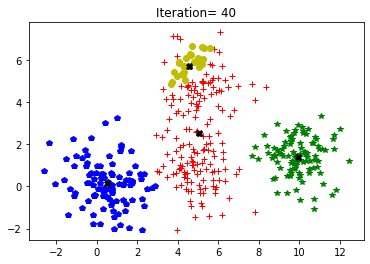

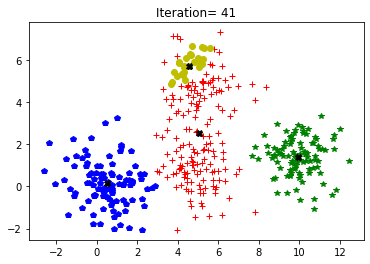

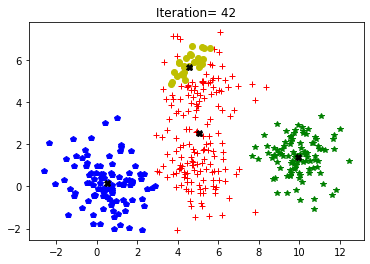

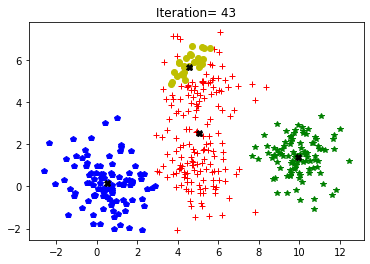

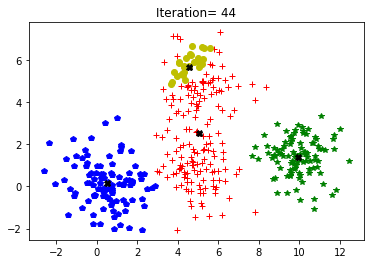

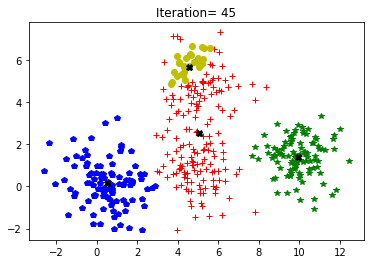

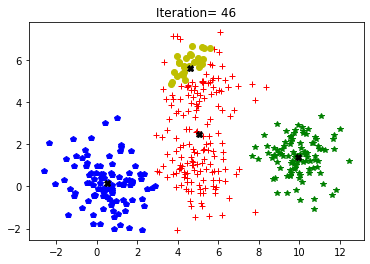

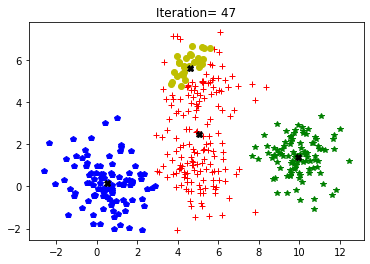

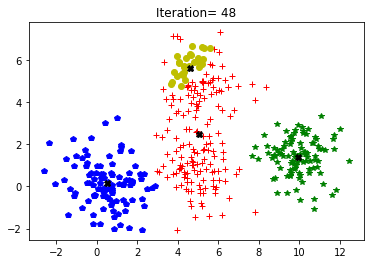

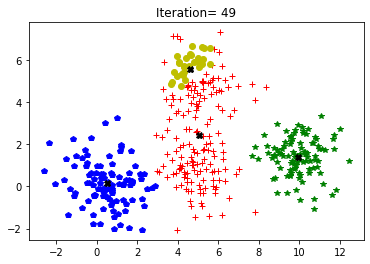

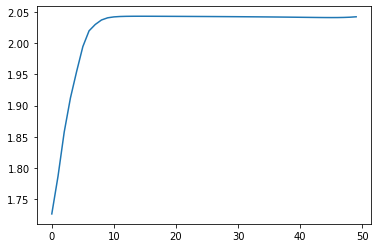

In [115]:
log_l=[]
Itr=50
eps=10**(-14)  # for threshold
clr=['r','g','b','y','k','m','c']
mrk=['+','*','p','o','.','<','X']


K = 4   # no. of clusters

theta=initialization(Data,K)

for n in range(Itr):

  responsibility=E_Step_GMM(Data,K,theta)

  cluster_label=np.argmax(responsibility,axis=1) #Label Points
  if n==0:
    temp = cluster_label
  theta,log_likhd=M_Step_GMM(Data,responsibility)

  log_l.append(log_likhd)

  plt.figure()
  for l in range(K):
    id=np.where(cluster_label==l)
    plt.plot(Data[id,0],Data[id,1],'.',color=clr[l],marker=mrk[l])
  Cents=theta[0]
  plt.plot(Cents[:,0],Cents[:,1],'X',color='k')
  plt.title('Iteration= %d' % (n))

  if n>2:
    if abs(log_l[n]-log_l[n-1])<eps:
      break


plt.figure()  
plt.plot(log_l)

**Step 6 : Performance metric**

Compute Homogeneity score and Silhouette coefficient using the information given below 

Homogeneity score : A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.
This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

Silhouette coeeficient : 

$a(x)$ : Average distance of x to all other vectors in same cluster

$b(x)$ : Average distance of x to the vectors in other clusters. Find minimum among the clusters

$s(x)$ = $\frac{b(x) - a(x)}{max(a(x),b(x))}$

Silhouette coefficient (SC) : 

$$ SC =  \frac{1}{N}\sum_{i=1}^{N}s(x) $$

In [124]:
print("homogeneity score of the Data is ", homogeneity_score(cluster_label,temp))


for y in range(0,4):
    for x in Data[cluster_label==y]:
        a = np.mean(np.linalg.norm(Data[cluster_label==y,:]-x))
        b = np.mean(np.linalg.norm(Data-x))
        S_gmm = np.concatenate((S_gmm, np.array([(b-a)*1/(np.maximum(a,b))])))

print("silhouette coefficient :",np.mean(S_gmm))

homogeneity score of the Data is  0.6144723513339857
silhouette coefficient : 0.7335963361800505


# GMM v/s K-means

(a) Generate Data to show shortcomings of Kmeans and advantage of GMM over it

(b) Perform GMM on the same data and justify how it is better than K-means in that particular case

(c) Verify the same using performance metrics

In [177]:
Data1 = np.random.normal(loc = (0.5, 0),scale = (1, 1), size = (100, 2)) 
Data2 = np.random.normal(loc = (5, 5),scale = (1, 1), size = (100, 2))
Data3 = np.random.normal(loc = (5, 1),scale = (1, 1), size = (100, 2))
Data4 = np.random.normal(loc = (10, 1.5),scale = (1, 1), size = (100, 2))
x1 = [x for x, y in Data1]
y1 = [y for x, y in Data1]

x2 = [x for x, y in Data2]
y2 = [y for x, y in Data2]

x3 = [x for x, y in Data3]
y3 = [y for x, y in Data3]

x4 = [x for x, y in Data4]
y4 = [y for x, y in Data4]



In [178]:
print('Kmeans :')
Data = np.array([x1+x2+x3+x4,y1+y2+y3+y4]).T
Data_perm = np.random.permutation(Data)
mu = Data_perm[0:4]
c_init = np.array([])
for x in Data:
        k = np.argmin([ np.linalg.norm(i-np.array(x)) for i in mu])
        c_init = np.concatenate((c_init,[k]))

iter = 25
while iter:
    iter -= 1
    c = np.array([])
    #cluster assignment
    for x in Data:
        k = np.argmin([ np.linalg.norm(i-np.array(x)) for i in mu])
        c = np.concatenate((c,[k]))

    #new means
    for z in range(0,4):
        mu[z] = np.mean(Data[c == z,:], axis = 0)

print("homogeneity score of the Data is ", homogeneity_score(c,c_init))

S_x = np.array([])

for y in range(0,4):
    for x in Data[c==y]:
        a = np.mean(np.linalg.norm(Data[c==y,:]-x))
        b = np.mean(np.linalg.norm(Data-x))
        S_x = np.concatenate((S_x, np.array([(b-a)*1/(np.maximum(a,b))])))

print("silhouette coefficient :",np.mean(S_x))


Kmeans :
homogeneity score of the Data is  0.9217692378528837
silhouette coefficient : 0.8266163737323375


In [215]:
print("GMM :")
K = 4   # no. of clusters

theta=initialization(Data,K)

for n in range(Itr):

  responsibility=E_Step_GMM(Data,K,theta)

  cluster_label=np.argmax(responsibility,axis=1) #Label Points
  if n==0:
    temp = cluster_label
  theta,log_likhd=M_Step_GMM(Data,responsibility)

  log_l.append(log_likhd)

  
  if n>2:
    if abs(log_l[n]-log_l[n-1])<eps:
      break

print("homogeneity score of the Data is ", homogeneity_score(cluster_label,temp))


for y in range(0,4):
    for x in Data[cluster_label==y]:
        a = np.mean(np.linalg.norm(Data[cluster_label==y,:]-x))
        b = np.mean(np.linalg.norm(Data-x))
        S_gmm = np.concatenate((S_gmm, np.array([(b-a)*1/(np.maximum(a,b))])))

print("silhouette coefficient :",np.mean(S_gmm))


GMM :
homogeneity score of the Data is  0.6845567713080638
silhouette coefficient : 0.6879558332237602


# Practical Use Case : K-means Clustering

For this exercise we will be using the **IRIS FLOWER DATASET** and explore how K-means clustering is performing

**IRIS Dataset** consists of 50 samples from each of the three species of Iris flower (Iris Setosa, Iris Viriginca and Iris Versicolor)

Four features were measured from each sample : Length of Sepals, Width of sepals, Length of Petals, Width of Sepals all in centimeters. Based on the combinations of these 4 features each flower was categorized into one of the 3 species




**Steps :** 

(a) Convert the given iris.csv file into a Pandas Dataframe, then extract both feature vector and target vector

(b) Perform analysis of Dataset, Plot the following features : (Sepal Length vs Sepal Width), (Petal Length vs Petal Width)


(c) Next group the data points into 3 clusters using the above K-means Clustering algorithm and compare the performance against the true labels obtained by the target vector, Also explain the results using a Confusion matrix

(d) Next use scikit learn tool to perform K-means Clustering and compare the performance against the true labels obtained by the target vector, Also explain the results using a Confusion matrix

(e) Vary the Number of Clusters (K) and run K-means algorithm from 1-10 and find the optimal number of clusters

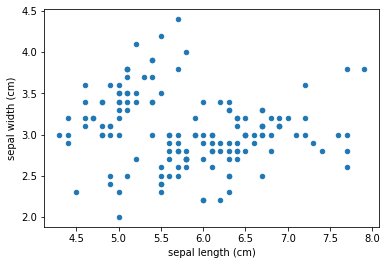

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

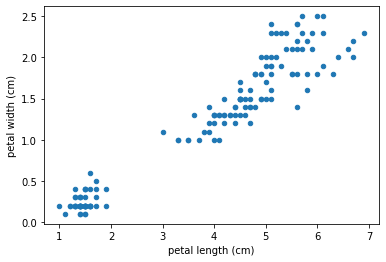

In [180]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
X = pd.DataFrame(iris["data"],columns=iris['feature_names'])
y = pd.DataFrame(iris['target'])
c_0 = np.ravel(np.array(np.copy(y)))
X_arr = np.array(X)





X.plot('sepal length (cm)','sepal width (cm)',kind ='scatter')
plt.show()
X.plot('petal length (cm)','petal width (cm)',kind ='scatter')



In [216]:
#K means implementation hard code
X_perm = np.random.permutation(X_arr)
mu = X_perm[0:3]


iter = 50
while iter:
    iter -= 1
    c1 = np.array([])
    #cluster assignment
    for x in X_arr:
        k = np.argmin([ np.linalg.norm(i-np.array(x)) for i in mu])
        c1 = np.concatenate((c1,[k]))
    #new means
    for z in range(0,3):
        mu[z] = np.mean(X_arr[c1 == z,:], axis = 0)



from sklearn.metrics import confusion_matrix
print("homogeneity score of the Data is ", homogeneity_score(c_0,c1))

S_x = np.array([])

for y in range(0,3):
    for x in X_arr[c1==y]:
        a = np.mean(np.linalg.norm(X_arr[c1==y,:]-x))
        b = np.mean(np.linalg.norm(X_arr-x))
        S_x = np.concatenate((S_x, np.array([(b-a)*1/(np.maximum(a,b))])))

print("silhouette coefficient :",np.mean(S_x))
print(confusion_matrix(c_0,c1))



homogeneity score of the Data is  0.736419288125285
silhouette coefficient : 0.7928932701594613
[[ 0 50  0]
 [ 3  0 47]
 [36  0 14]]


In [182]:
#scikit learn implementation
from sklearn.cluster import KMeans

model = KMeans(init="k-means++", n_clusters=3, n_init=10)
Z = model.fit_transform(X_arr)

c1 = model.predict(X_arr)

print("homogeneity score of the Data is ", homogeneity_score(c_0,c1))

S_x = np.array([])

for y in range(0,3):
    for x in X_arr[c1==y]:
        a = np.mean(np.linalg.norm(X_arr[c1==y,:]-x))
        b = np.mean(np.linalg.norm(X_arr-x))
        S_x = np.concatenate((S_x, np.array([(b-a)*1/(np.maximum(a,b))])))

print("silhouette coefficient :",np.mean(S_x))
print(confusion_matrix(c_0,c1))



homogeneity score of the Data is  0.7514854021988338
silhouette coefficient : 0.7916403609716993
[[ 0 50  0]
 [ 2  0 48]
 [36  0 14]]


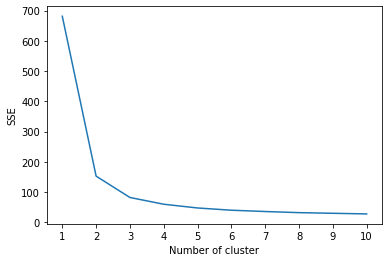

In [183]:
#optimal K using elbow plot

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris['feature_names'])
#print(X)
data = X[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.xticks(range(1, 11))
plt.show()

# Practical Use Case : GMM

**Steps :** 

(a) Convert the given iris.csv file into a Pandas Dataframe, then extract both feature vector and target vector

(b) Next group the data points into 3 clusters using the above GMM Clustering algorithm and compare the performance against the true labels obtained by the target vector, Also explain the results using a Confusion matrix

(c) Next use scikit learn tool to perform GMM Clustering and compare the performance against the true labels obtained by the target vector, Also explain the results using a Confusion matrix

In [217]:
iris = load_iris()
X = pd.DataFrame(iris["data"],columns=iris['feature_names'])
y = pd.DataFrame(iris['target'])
c_0 = np.ravel(np.array(np.copy(y)))
X_arr = np.array(X)


In [266]:
def M_Step_GMM(data,responsibility):
    mc = np.sum(responsibility, axis=0)
    pi = mc/np.sum(mc)
    mu = np.dot(responsibility.T, data) / mc.reshape(3,1)
    reg_cov = 1e-6*np.identity(len(data[0]))
    cov = []

    for r in range(len(pi)):
        covc = 1/mc[r] * (np.dot( (responsibility[:, r].reshape(len(data), 1)*(data-mu[r]) ).T, data - mu[r]) + reg_cov)
        cov.append(covc)

    cov = np.asarray(cov)
    
    likelihood_sum = np.sum([pi[r]*multivariate_normal(mu[r], cov[r] + reg_cov).pdf(data) for r in range(len(pi))])
    log_likelihood = np.sum(np.log(likelihood_sum))
    
    theta = (mu,cov,pi)
    return theta, log_likelihood
K = 3  # no. of clusters

theta=initialization(X_arr,K)

for n in range(Itr):

  responsibility=E_Step_GMM(X_arr,K,theta)

  cluster_label=np.argmax(responsibility,axis=1) #Label Points
  if n==0:
    temp = cluster_label
  theta,log_likhd=M_Step_GMM(X_arr,responsibility)

  log_l.append(log_likhd)


  if n>2:
    if abs(log_l[n]-log_l[n-1])<eps:
      break

print("homogeneity score of the Data is ", homogeneity_score(cluster_label,temp))


for i in range(0,3):
    for x in X_arr[cluster_label==y]:
        a = np.mean(np.linalg.norm(X_arr[cluster_label==i,:]-x))
        b = np.mean(np.linalg.norm(X_arr-x))
        S_gmm = np.concatenate((S_gmm, np.array([(b-a)*1/(np.maximum(a,b))])))

print("silhouette coefficient :",np.mean(S_gmm))
print(confusion_matrix(cluster_label,c_0))




homogeneity score of the Data is  0.7853722205498714
silhouette coefficient : 0.6377678394555819
[[50  0  0]
 [ 0 45  0]
 [ 0  5 50]]
